<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/IMDB_TOP_250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('imdb_top_250.csv')
df.head(11)

,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96
5,6,Schindler's List,1993,9.0,195
6,7,The Lord of the Rings: The Return of the King,2003,8.9,201
7,8,Pulp Fiction,1994,8.9,154
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,178
9,10,The Good the Bad and the Ugly,1966,8.8,178


In [3]:
df.tail(11)

,Rank,Title,Year,Rating,Runtime
239,240,Castle in the Sky,1986,8.0,125
240,241,The Red Shoes,1948,8.0,135
241,242,Underground,1995,8.0,170
242,243,The Hustler,1961,8.0,134
243,244,A Woman Under the Influence,1974,8.0,155
244,245,Mary and Max,2009,8.0,92
245,246,Dersu Uzala,1975,8.0,142
246,247,Monsters Inc.,2001,8.0,92
247,248,Miracle in Cell No. 7,2019,8.0,132
248,249,Children of Heaven,1997,8.0,89


In [4]:
df.shape

(250, 5)

In [5]:
df.columns

Index(['Rank', 'Title', 'Year', 'Rating', 'Runtime'], dtype='object')

In [6]:
df.dtypes

,0
Rank,int64
Title,object
Year,int64
Rating,float64
Runtime,int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     250 non-null    int64  
 1   Title    250 non-null    object 
 2   Year     250 non-null    int64  
 3   Rating   250 non-null    float64
 4   Runtime  250 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.9+ KB


In [8]:
df.describe()

,Rank,Year,Rating,Runtime
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,1985.57200,8.253200,129.108000
std,72.312977,24.50729,0.255874,31.573468
min,1.000000,1921.00000,8.000000,45.000000
25%,63.250000,1966.25000,8.025000,107.000000
50%,125.500000,1993.00000,8.200000,126.000000
75%,187.750000,2004.75000,8.400000,144.500000
max,250.000000,2020.00000,9.300000,312.000000


In [9]:
df.isnull().sum()

,0
Rank,0
Title,0
Year,0
Rating,0
Runtime,0


In [10]:
df.duplicated().sum()

np.int64(0)

# Visualization

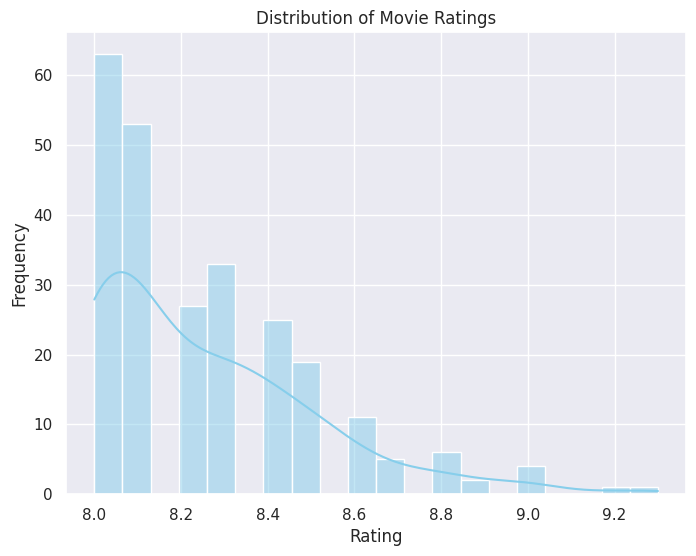

In [11]:
# Plot 1: Distribution of Movie Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

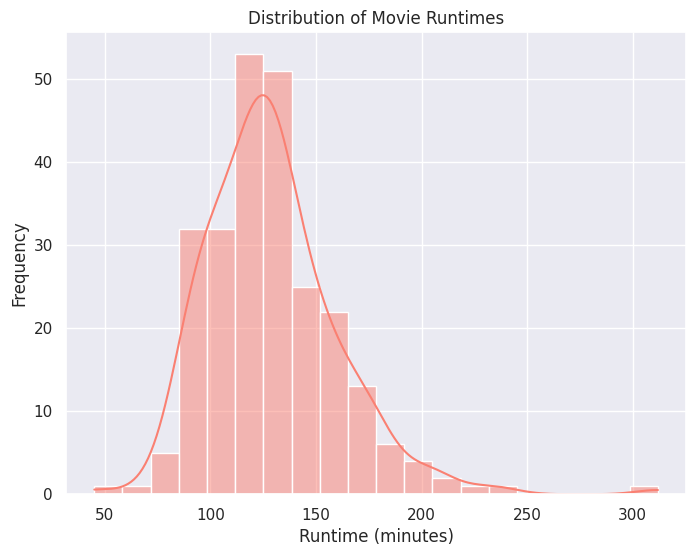

In [12]:
# Plot 2: Distribution of Movie Runtimes
plt.figure(figsize=(8, 6))
sns.histplot(df['Runtime'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

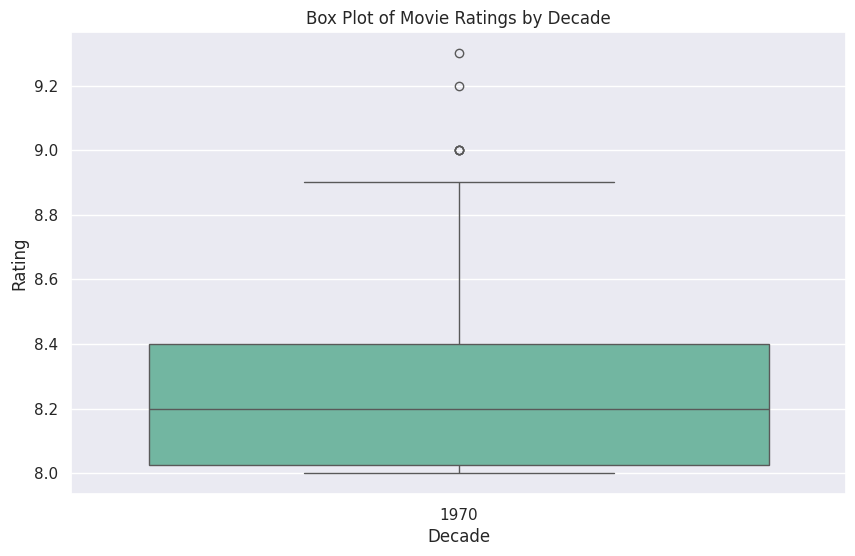

In [17]:
# Plot 3: Box Plot for Ratings by Decade
# Create a new column to represent the decade
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
df['Decade'] = (df['Year'] // 10) * 10

plt.figure(figsize=(10, 6))
sns.boxplot(x='Decade', y='Rating', data=df, palette='Set2')
plt.title('Box Plot of Movie Ratings by Decade')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.show()


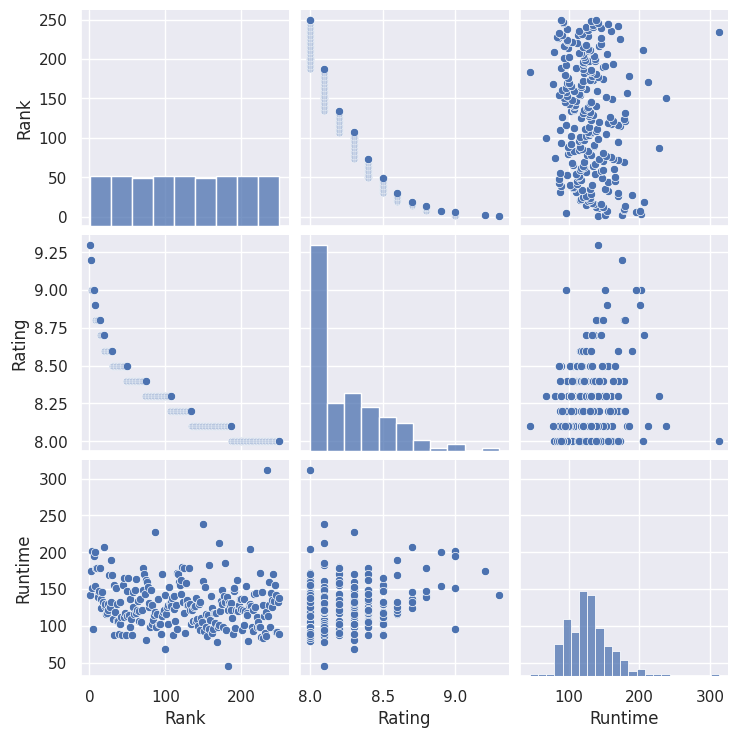

In [14]:
# Plot 4: Pair Plot for numeric variables
# We limit to numeric columns: Rank, Rating, and Runtime (Year is date now)
sns.pairplot(df[['Rank', 'Rating', 'Runtime']])
plt.show()

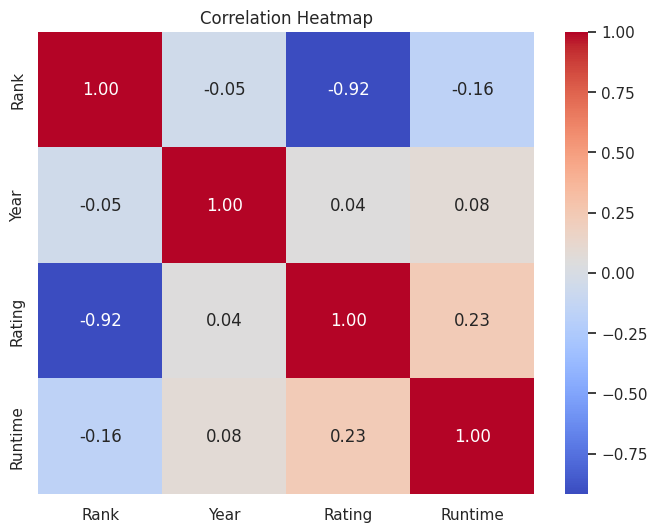

In [15]:
# Plot 5: Correlation Heatmap for numeric variables
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print('Not enough numeric columns for a heatmap (requires 4 or more).')

In [16]:
# Thank you